In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px

%matplotlib inline

df = pd.read_csv('csv/kc_house_data.csv')

In [2]:
df['nivel'] = df['price'].apply(lambda x: 0 if (x <= 321950) else 1 if ((x > 321950) and (x <= 450000)) else 2 if ((x > 450000) and (x <= 640000)) else 3)

<BarContainer object of 4 artists>

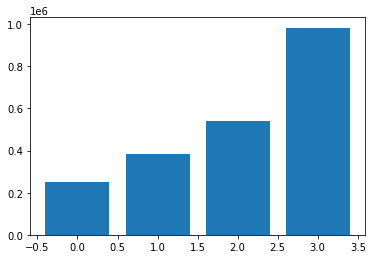

In [3]:
preco_medio_por_nivel = df[['nivel', 'price']].groupby('nivel').mean().reset_index()

plt.bar(preco_medio_por_nivel.nivel, preco_medio_por_nivel.price)

In [4]:
df['size'] = df['sqft_living'].apply(lambda x: 0 if x <= 1427 else 1 if ((x > 1427) and (x <= 1910)) else 2 if ((x > 1910) and (x <= 2550)) else 3)

In [5]:
tam_medio_por_size = df[['size', 'sqft_living']].groupby('size').mean().reset_index()

tam_medio_por_size['size']

0    0
1    1
2    2
3    3
Name: size, dtype: int64

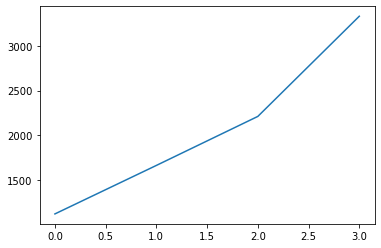

In [6]:
plt.plot(tam_medio_por_size['size'], tam_medio_por_size.sqft_living)

In [7]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='geopyExercises')

In [8]:
import time
from multiprocessing import Pool

In [9]:
df['query'] = df[['lat', 'long']].apply(lambda x: str(x.lat) + ',' + str(x.long), axis=1)
df['query']

0        47.5112,-122.257
1         47.721,-122.319
2        47.7379,-122.233
3        47.5208,-122.393
4        47.6168,-122.045
               ...       
21608    47.6993,-122.346
21609    47.5107,-122.362
21610    47.5944,-122.299
21611    47.5345,-122.069
21612    47.5941,-122.299
Name: query, Length: 21613, dtype: object

In [17]:
import defs

df1 = df[['id', 'query']]
p = Pool (3)

start = time.process_time()

df1[['place_id', 'osm_type', 'country', 'country_code']] = p.map(defs.get_data, df1.iterrows())
end = time.process_time()

print(f'Time Elapsed: {(end-start)}')

Time Elapsed: 4.830931


/Users/juniorbonfim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [18]:
df1

id             query   place_id osm_type        country  \
0      7129300520  47.5112,-122.257  161022547      way  United States   
1      6414100192   47.721,-122.319  160016678      way  United States   
2      5631500400  47.7379,-122.233   74951055     node  United States   
3      2487200875  47.5208,-122.393  156726151      way  United States   
4      1954400510  47.6168,-122.045  296045104      way  United States   
...           ...               ...        ...      ...            ...   
21608   263000018  47.6993,-122.346   20911064     node  United States   
21609  6600060120  47.5107,-122.362  230903354      way  United States   
21610  1523300141  47.5944,-122.299  158337707      way  United States   
21611   291310100  47.5345,-122.069  296140531      way  United States   
21612  1523300157  47.5941,-122.299  158139459      way  United States   

      country_code  
0               us  
1               us  
2               us  
3               us  
4               us  
...            ...  
21608           us  
21609           us  
21610           us  
21611           us  
21612           us  

[21613 rows x 6 columns]

# dashboard filters

In [27]:
df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [28]:
import ipywidgets as widgets
from matplotlib import gridspec

In [30]:
# df['year_renovation'] = pd.to_datetime(df[])
date_avaliable = widgets.SelectionSlider(options = df['date'].sort_values().unique().tolist(),
                                        value = '2014-12-01',
                                        description = 'Disponível',
                                        continous_update = False,
                                        orientation = 'horizontal',
                                        readout = True)

# Map Filters

In [46]:
living_size = widgets.SelectionSlider(options = df.sqft_living.sort_values().unique().tolist(),
                                     value = df.sqft_living[0],
                                     description = 'Tamanho Mínimo da Sala de Estar',
                                     continuous_update = False,
                                     orientation = 'horizontal',
                                     readout = True)

living_size

SelectionSlider(continuous_update=False, description='Tamanho Mínimo da Sala de Estar', index=109, options=(29…

In [98]:
bathroom_number = widgets.IntSlider( value = int(df.bathrooms[0]),
                                     min = int(df.bathrooms.min()),
                                     max = int(df.bathrooms.max()),
                                     description = 'Número de Banheiros',
                                     continuous_update = False,
                                     orientation = 'horizontal',
                                     readout = True )

bathroom_number

IntSlider(value=1, continuous_update=False, description='Número de Banheiros', max=8)

In [45]:
max_price = widgets.FloatSlider(value = df.price[0],
                               min = df.price.min(),
                               max = df.price.max(),
                               step = 10.0,
                               description = 'Preço Máximo',
                               disabled = False,
                               continuous_update = False,
                               orientation = 'horizontal',
                               readout = True)

max_price

FloatSlider(value=221900.0, continuous_update=False, description='Preço Máximo', max=7700000.0, min=75000.0, s…

In [68]:
basement_size = widgets.IntSlider(value = np.ceil(df.sqft_basement.mean()),
                               min = df.sqft_basement.min(),
                               max = df.sqft_basement.max(),
                               step = 10,
                               description = 'Tamanho Máximo da Área do Porão',
                               disabled = False,
                               continuous_update = False,
                               orientation = 'horizontal',
                               readout = True)

basement_size

IntSlider(value=292, continuous_update=False, description='Tamanho Máximo da Área do Porão\n', max=4820, step=…

In [76]:
condition = widgets.Dropdown(options = df.condition.sort_values().unique().tolist(),
                            value = np.floor(df.condition.mean()),
                            description = 'Condição do Imóvel',
                            disable = False)
condition

Dropdown(description='Condição do Imóvel', index=2, options=(1, 2, 3, 4, 5), value=3)

In [79]:
year_construction = widgets.SelectionSlider(options = df.yr_built.sort_values().unique().tolist(),
                                     value = df.yr_built[0],
                                     description = 'Ano de Construção',
                                     continuous_update = False,
                                     orientation = 'horizontal',
                                     readout = True)

year_construction

SelectionSlider(continuous_update=False, description='Ano de Construção', index=55, options=(1900, 1901, 1902,…

In [95]:
def update_map(df, living_size, bathroom_number, max_price, basement_size, condition, year_construction):
    houses = df[(df['sqft_living'] > living_size) & df['bathrooms'] >= bathroom_number][['id', 'lat', 'long', 'price', 'nivel']].copy()
#               (df['bathrooms'] > bathroom_number) & (df['price'] <= max_price) & (df['sqft_basement'] <= basement_size) & (df['condition'] == condition) & (df['yr_built'] == year_construction)]
    
    
    fig = px.scatter_mapbox(houses,
                           lat = 'lat',
                           lon = 'long', 
                           color = 'nivel',
                           size = 'price',
                           color_continuous_scale = px.colors.cyclical.IceFire,
                           size_max = 15,
                           zoom = 10)
    
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0,  'b':0})
    fig.show()

In [89]:
from ipywidgets import fixed

In [99]:
widgets.interactive(update_map, 
                    df=fixed(df), 
                    living_size = living_size, 
                    bathroom_number = bathroom_number, 
                    max_price = max_price, 
                    basement_size = basement_size, 
                    condition = condition, 
                    year_construction = year_construction)

interactive(children=(SelectionSlider(continuous_update=False, description='Tamanho Mínimo da Sala de Estar', …